In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Exploratory Data Analysis

In [100]:
data = pd.read_csv("data/data.csv", index_col=0)
x = data['streamer_name'].to_numpy()
y = data['interactivity'].to_numpy()

Max: 1.0
Min: 6.800480654150321e-07
Mean: 0.08501977571357383
Standard diviation: 0.10526918200368014
Variance: 0.011081600679723934


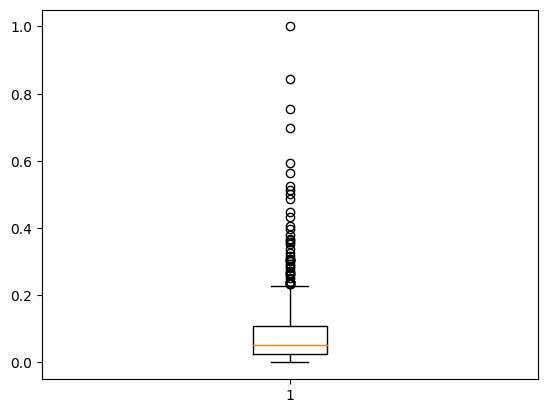

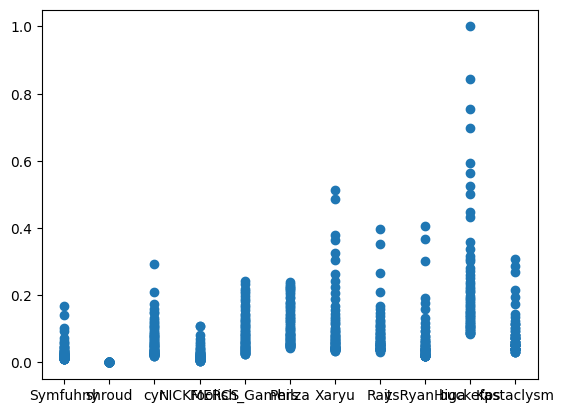

In [103]:
plt.boxplot(y)
print(f"Max: {np.max(y)}")
print(f"Min: {np.min(y)}")
print(f"Mean: {np.mean(y)}")
print(f"Standard diviation: {np.std(y)}")
print(f"Variance: {np.var(y)}")
plt.show()
plt.plot(x,y, 'o')
plt.show()

In [104]:
acoustic_features = pd.read_pickle("acousticfeatures.pkl")
X_acoustic_features = np.stack(acoustic_features['feature vector'].to_numpy())
# Normalize acoustic features between -1 and 1 based on the min and max values of each index
X_acoustic_features = np.transpose(X_acoustic_features)
for i in range(len(X_acoustic_features)):    
 X_acoustic_features[i] = (X_acoustic_features[i] - np.min(X_acoustic_features[i])) / (np.max(X_acoustic_features[i]) - np.min(X_acoustic_features[i])) * 2 - 1
X_acoustic_features = np.transpose(X_acoustic_features)

In [118]:
y = []
for path in acoustic_features['file']:
  y.append(data[data['audio_path'].str.contains(path)]['interactivity'])
y = np.array(y)

In [192]:
for i in range(6):
 print(f"{i}: {(np.corrcoef(np.transpose(X_acoustic_features)[i], y.reshape(656,)))[1][0]}")

0: -0.13841832296489043
1: -0.16489352323162101
2: -0.15254589040041816
3: -0.17695689183293867
4: 0.07831001673734778
5: 0.09962917237090516


In [167]:
# Random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_acoustic_features, y, test_size=0.3, random_state=0)
random_forest = RandomForestRegressor(random_state=0, n_estimators=500, max_depth=10)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

C:\Users\trick\AppData\Local\Temp\ipykernel_11332\1081295299.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


In [168]:
y_test = y_test.reshape(197,)
# Correlation between predicted and actual values
np.corrcoef(y_pred, y_test)

array([[1.        , 0.20303614],
       [0.20303614, 1.        ]])

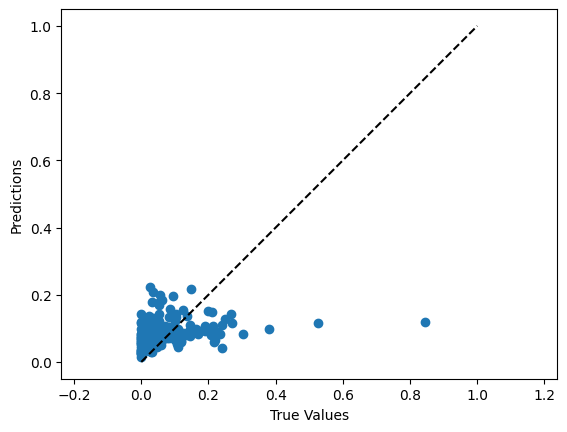

In [169]:
# Plot with axis labels. Also, axis scale should be equal
plt.plot(y_test, y_pred, 'o')
plt.plot([0, 1], [0, 1], 'k--')
plt.axis('equal')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [180]:
# Neural network
from sklearn.neural_network import MLPRegressor

neural_network = MLPRegressor(random_state=0, max_iter=10000, hidden_layer_sizes=(100, 100, 100))
neural_network.fit(X_train, y_train)
y_pred = neural_network.predict(X_test)

d:\Desktop\mml-final\Streamer-Interactivity-Analyzer\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [181]:
# Correlation between predicted and actual values
y_test = y_test.reshape(197,)
np.corrcoef(y_pred, y_test)

array([[1.        , 0.28385697],
       [0.28385697, 1.        ]])

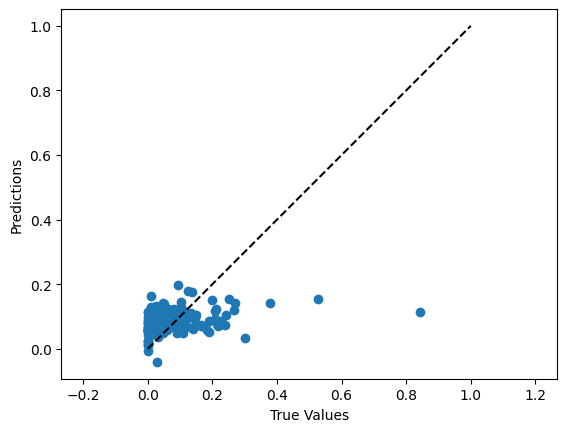

In [182]:
# Plot with axis labels. Also, axis scale should be equal
plt.plot(y_test, y_pred, 'o')
plt.plot([0, 1], [0, 1], 'k--')
plt.axis('equal')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()